In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [20]:
data_dict = pd.read_csv(r'C:\Users\Lucas\Documents\NOVA IMS\Machine Learning\Final Project\Nata_Files\data_dictionary.csv')
pastel_d_nata_lrn = pd.read_csv(r'C:\Users\Lucas\Documents\NOVA IMS\Machine Learning\Final Project\Nata_Files\learn.csv', index_col=0)
pastel_d_nata_pred = pd.read_csv(r'C:\Users\Lucas\Documents\NOVA IMS\Machine Learning\Final Project\Nata_Files\predict.csv', index_col=0)
pastel_d_nata_sampred = pd.read_csv(r'C:\Users\Lucas\Documents\NOVA IMS\Machine Learning\Final Project\Nata_Files\sampred.csv', index_col=0)

In [4]:
data_dict

,Feature,Type,Description,Unit
0,id,Numeric,Internal identifier for each record,-
1,ambient_humidity,Numeric,Kitchen ambient humidity during baking,%
2,baking_duration,Numeric,Total baking time at high temperature,minutes
3,cooling_period,Numeric,Resting time after baking before removal,minutes
4,cream_fat_content,Numeric,Fat percentage in cream used,%
5,egg_temperature,Numeric,Temperature of eggs when added to custard,°C
6,egg_yolk_count,Numeric,Number of egg yolks per batch,count
7,final_temperature,Numeric,Measured temperature at end of baking,°C
8,lemon_zest_ph,Numeric,pH of lemon zest infusion in custard,pH scale
9,notes_baker,Text,Additional notes from baker (if any),-


In [21]:
pastel_d_nata_lrn.describe()

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract
count,5182.000000,5199.000000,5199.000000,5176.00000,5176.000000,5176.000000,5175.000000,5174.000000,0.0,5179.000000,5181.000000,5187.000000,5178.000000,5182.000000
mean,59.980316,26.979804,31.817850,98.41306,70.812403,10.498068,223.577198,3.218902,NaN,223.541031,216.413241,55.882034,54.003418,5.307159
std,11.616151,8.320079,14.427143,1.99735,35.439831,1.257709,85.258779,0.165909,NaN,84.482034,39.533116,34.867144,47.213038,1.483175
min,40.000000,14.000000,0.000000,91.90000,12.000000,8.000000,31.000000,2.700000,NaN,58.000000,114.000000,11.550000,6.000000,2.200000
25%,50.000000,21.000000,25.000000,97.10000,44.000000,10.000000,164.000000,3.100000,NaN,166.000000,192.000000,37.910000,18.000000,4.300000
50%,60.000000,25.000000,31.000000,98.40000,67.000000,10.000000,226.000000,3.200000,NaN,227.000000,209.000000,47.170000,30.000000,5.100000
75%,70.000000,30.000000,39.000000,99.80000,92.000000,11.000000,284.000000,3.300000,NaN,283.000000,231.000000,64.610000,80.675000,6.000000
max,80.000000,89.000000,105.000000,107.30000,575.000000,15.000000,722.000000,4.000000,NaN,713.000000,499.000000,640.320000,656.500000,20.800000


In [22]:
pastel_d_nata_lrn.isna().sum()

ambient_humidity       18
baking_duration         1
cooling_period          1
cream_fat_content      24
egg_temperature        24
egg_yolk_count         24
final_temperature      25
lemon_zest_ph          26
notes_baker          5200
origin                161
oven_temperature       21
pastry_type          1789
preheating_time        19
salt_ratio             13
sugar_content          22
vanilla_extract        18
quality_class           1
dtype: int64

In [23]:
pastel_d_nata_lrn = pastel_d_nata_lrn[pastel_d_nata_lrn['quality_class'].isna()==False]

## Distributions of the different Features
First we visualize the distributions of the raw data to get insights about outliers and distribution types.

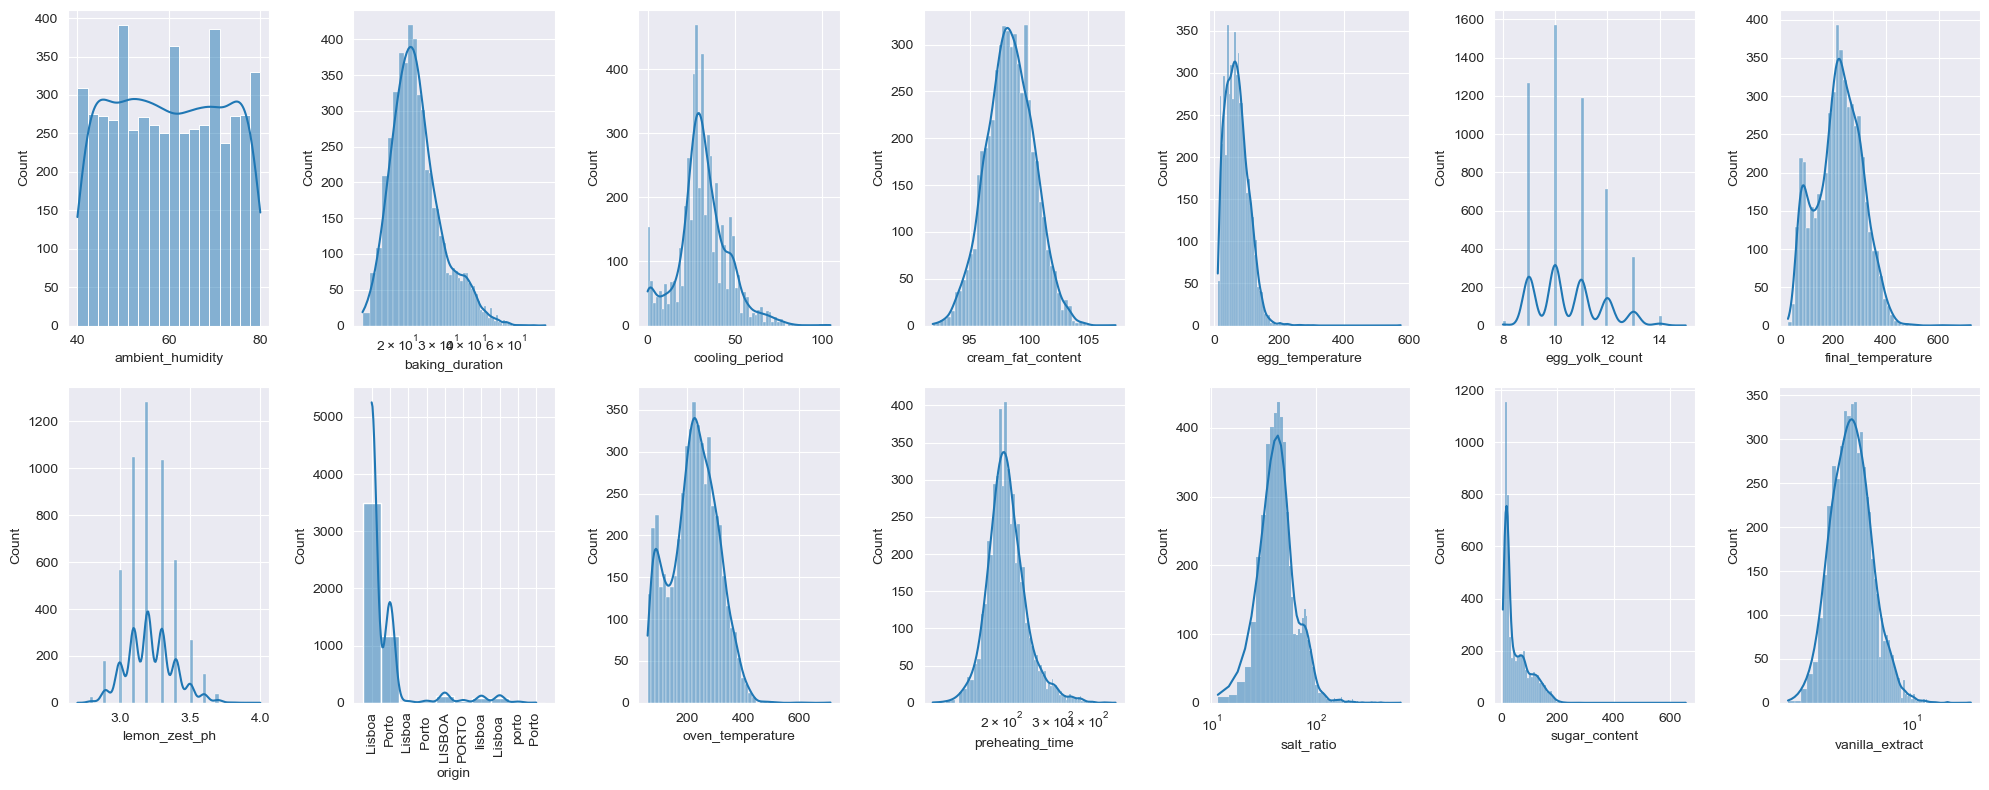

In [28]:
explore = pastel_d_nata_lrn.drop(['notes_baker','pastry_type', 'quality_class'], axis=1)

fig, axes = plt.subplots(2, 7, figsize=(20, 8))
axes = axes.flatten()

for ax, col in zip(axes, explore.columns):
    sns.histplot(explore[col].dropna(), ax=ax, kde=True)

axes[1].set_xscale('log')
#axes[2].set_xscale('log')
#axes[4].set_xscale('log')
#axes[6].set_xscale('log')
#axes[9].set_xscale('log')
axes[10].set_xscale('log')
axes[11].set_xscale('log')
#axes[12].set_xscale('log')
axes[13].set_xscale('log')

#will apply z-score scaling for cream_fat_content and lemon_zest_ph, min-max scaling for ambient_humidity and egg_yolk_count whereas we will be utilizing the box-cox scaling for logarithmically scaled plots and robust-scaling for the rest of the skewed data.

axes[8].set_xticks(range(explore.origin.nunique()))
axes[8].set_xticklabels(axes[8].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

We will apply z-score scaling for cream_fat_content and lemon_zest_ph, min-max scaling for egg_yolk_count whereas we will be utilizing the box-cox scaling for logarithmically scaled plots and robust-scaling for the rest of the skewed data.
___

#### Sorting origin

Considering that there are only two categories we decided on sorting these values properly.

In [35]:
origin_update = []
for city in pastel_d_nata_lrn['origin']:
    if 'lisboa' in str(city).lower() or 'lisbon' in str(city).lower():
        city='Lisbon'
        origin_update.append(city)
    elif 'porto' in str(city).lower():
        city='Porto'
        origin_update.append(city)
    else:
        origin_update.append(city)
pastel_d_nata_lrn.origin = origin_update
explore.origin=origin_update

Now that we got rid of the duplicates we can take a better look at the ratio between Lisbon and Porto
___

#### extreme outlier handling

Looking at the tails of the skewed distributions can give us insight on whether to clip any values and how many.

In [8]:
pastel_d_nata_lrn.sort_values('vanilla_extract', ascending=False)[['vanilla_extract','quality_class']].head()

,vanilla_extract,quality_class
id,,
4327,20.8,OK
2695,20.1,KO
2386,15.7,KO
4515,15.6,KO
2849,15.5,OK


In [93]:
pastel_d_nata_lrn.sort_values('baking_duration', ascending=False)[['baking_duration','quality_class']]

,baking_duration,quality_class
id,,
2227,89.0,KO
975,79.0,KO
1843,77.0,KO
331,73.0,KO
4776,71.0,KO
...,...,...
18,14.0,OK
1477,14.0,OK
685,14.0,OK


In [10]:
pastel_d_nata_lrn.sort_values('salt_ratio', ascending=False)[['salt_ratio','quality_class']].head()

,salt_ratio,quality_class
id,,
2695,640.32,KO
651,636.67,KO
2525,472.03,KO
3223,431.76,KO
2897,419.47,OK


In [11]:
pastel_d_nata_lrn.sort_values('sugar_content', ascending=False)[['sugar_content','quality_class']].head()

,sugar_content,quality_class
id,,
58,656.5,OK
1782,332.5,OK
3736,270.9,OK
558,262.1,OK
595,229.7,KO


In [94]:
pastel_d_nata_lrn.sort_values('egg_temperature', ascending=False)[['egg_temperature','quality_class']].head(9)

,egg_temperature,quality_class
id,,
1272,575.0,KO
5025,304.0,KO
3142,287.0,KO
3129,270.0,KO
5026,260.0,KO
3717,255.0,KO
3919,237.0,OK
5186,232.0,KO
4806,227.0,OK


Based on the highest values, we can see that although the tails are long, they tend to still have a lot of varied results in quality check. Because of that we want to see whether clipping only the top can help mitigate the skewness. Therefore the next step will be to se whether simply cutting the tails minimaly will have an impact on the distributions.

In [13]:
explore_new=explore.drop(explore.egg_temperature.nlargest(6).index)
explore_new=explore_new.drop(explore_new.sugar_content.nlargest(4).index)
explore_new=explore_new.drop(explore_new.salt_ratio.nlargest(5).index)
explore_new=explore_new.drop(explore_new.vanilla_extract.nlargest(5).index)
explore_new=explore_new.drop(explore_new.baking_duration.nlargest(10).index)

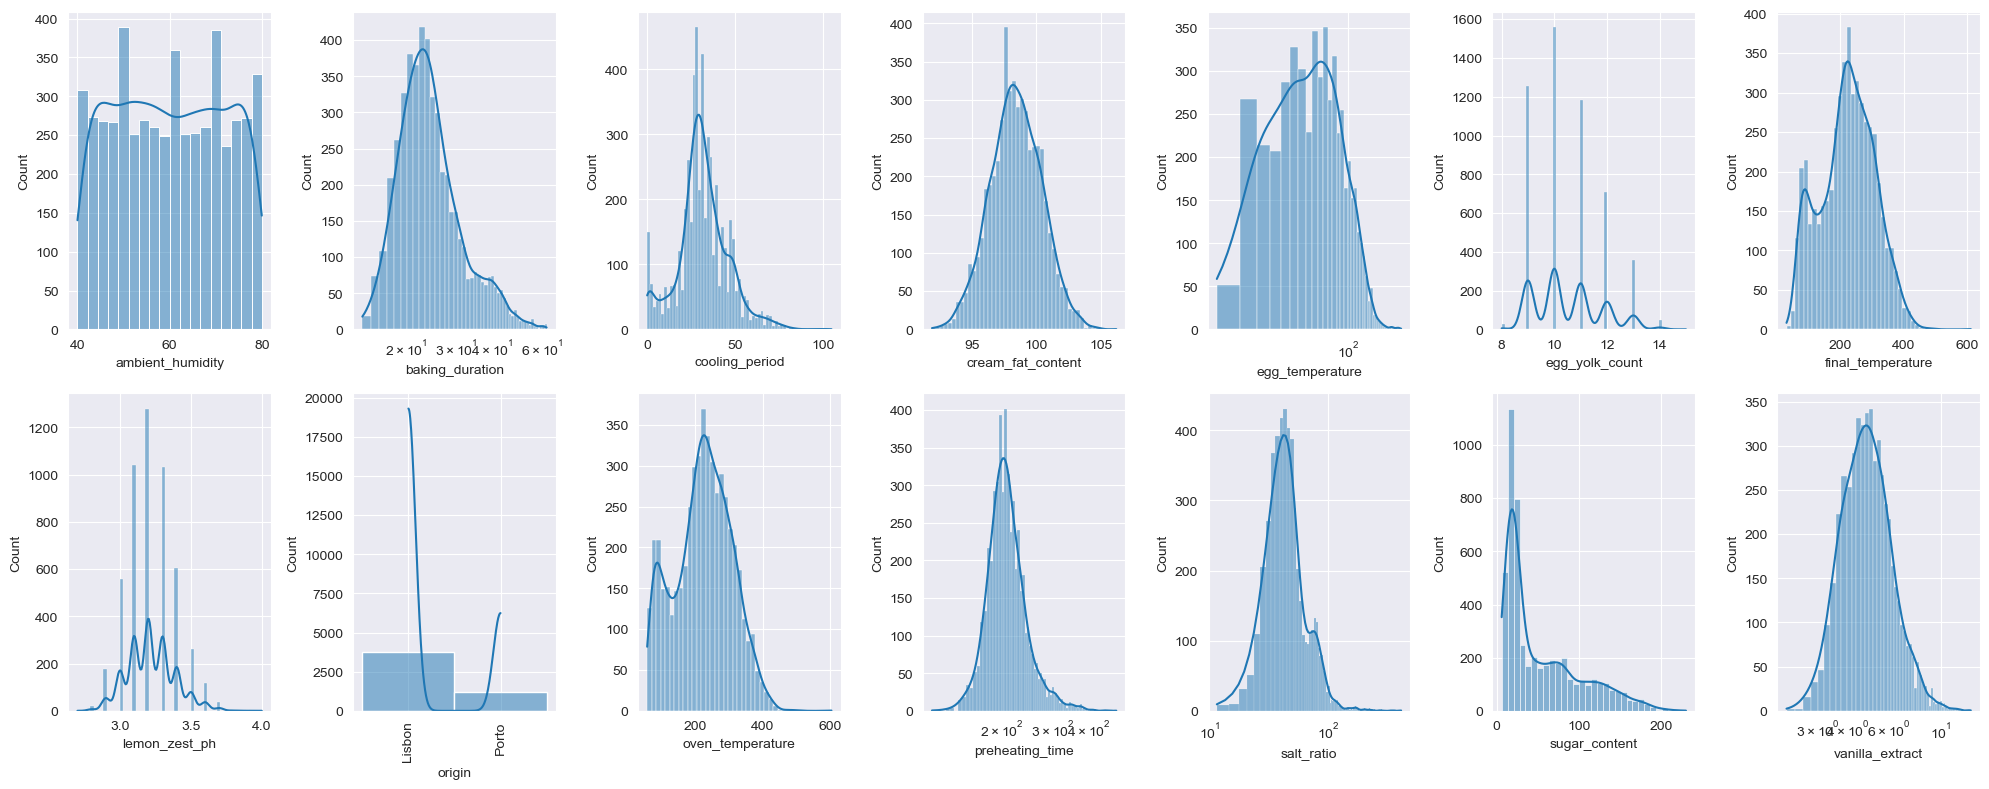

In [14]:
fig, axes = plt.subplots(2, 7, figsize=(20, 8))
axes = axes.flatten()

for ax, col in zip(axes, explore_new.columns):
    sns.histplot(explore_new[col].dropna(), ax=ax, kde=True)

axes[1].set_xscale('log')
axes[4].set_xscale('log')

axes[10].set_xscale('log')
axes[11].set_xscale('log')

axes[13].set_xscale('log')


axes[8].set_xticks(range(explore_new.origin.nunique()))
axes[8].set_xticklabels(axes[8].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

<Axes: >

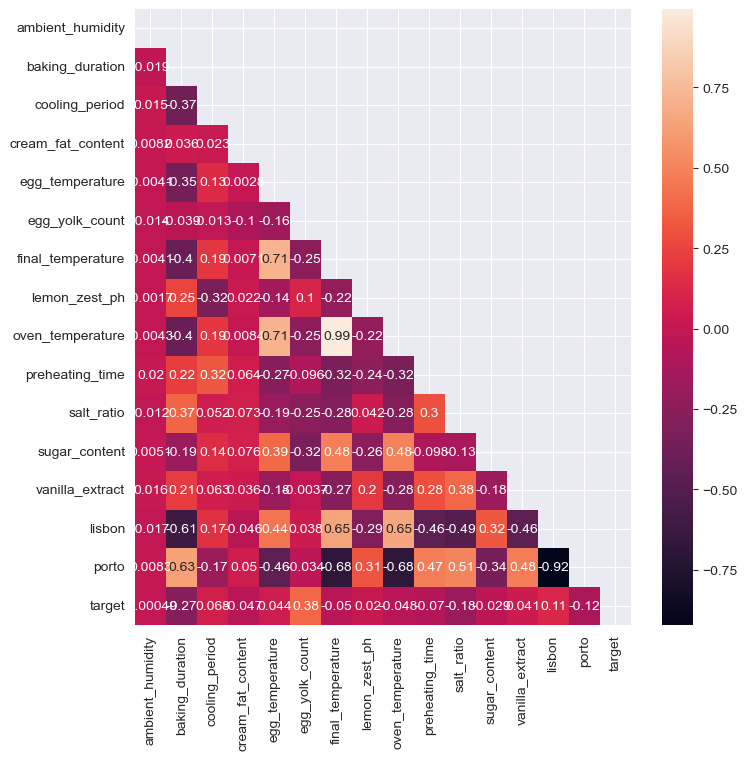

In [15]:
lisbon_dummy = [1 if city == 'Lisbon' else 0 for city in pastel_d_nata_lrn['origin']]
porto_dummy = [1 if city == 'Porto' else 0 for city in pastel_d_nata_lrn['origin']]
target_bin = [1 if trgt == 'OK' else 0 for trgt in pastel_d_nata_lrn['quality_class']]
explore_wd = pastel_d_nata_lrn.drop(['notes_baker','pastry_type', 'origin','quality_class'], axis=1)
explore_wd['lisbon'] = lisbon_dummy
explore_wd['porto'] = porto_dummy
explore_wd['target'] = target_bin

exploration_correlation = explore_wd.corr()
mask = np.triu(exploration_correlation)
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(exploration_correlation, mask=mask,annot=True)

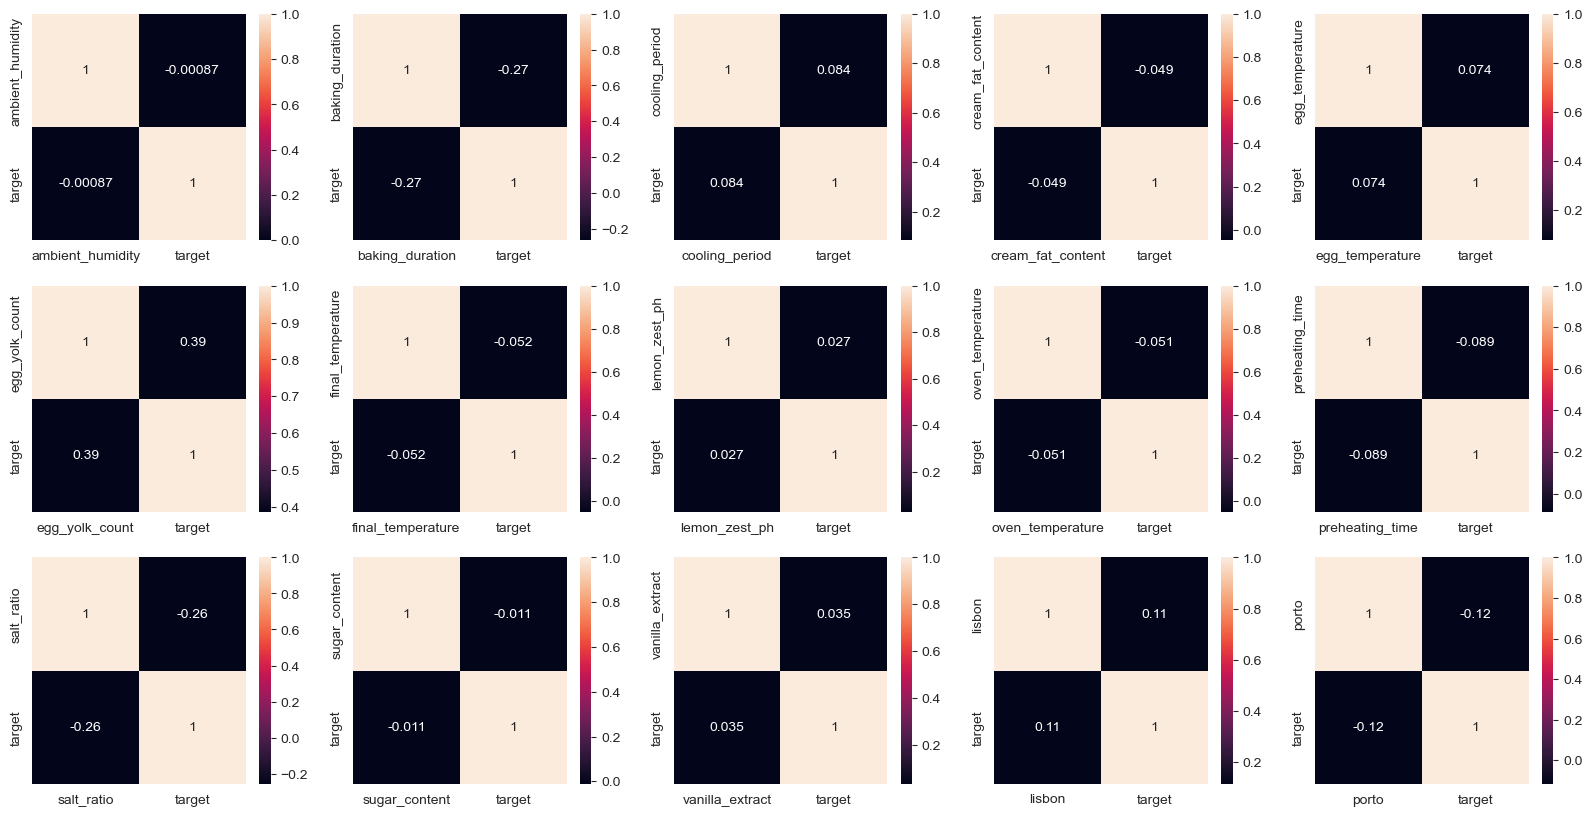

In [16]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for ax, col in zip(axes, explore_wd.drop('target',axis=1).columns):
    sns.heatmap(explore_wd[[col, 'target']].corr('spearman'), ax=ax, annot=True)

considering how uniformally distributed the ambient humidity is we will be cutting this feature entirely. We will also be considering cutting the feature cooling period due to it's irrelevance

in order to mitigate skewness we will be getting rid of the maximum values from sugar content, salt ratio and egg temperature because they are significantly higher than the next highest values.


In [84]:
X=explore
X.origin = X.origin.map({'Lisbon': 1, 'Porto': 0})
y=pastel_d_nata_lrn['quality_class']
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state = 15)

In [129]:
dtc = DecisionTreeClassifier(max_leaf_nodes = 95).fit(X_train, y_train)

In [130]:
pd.DataFrame(dtc.feature_importances_, index=X_train.columns, columns=['feature importance'])

,feature importance
ambient_humidity,0.013948
baking_duration,0.196646
cooling_period,0.021572
cream_fat_content,0.014346
egg_temperature,0.080695
egg_yolk_count,0.356915
final_temperature,0.050910
lemon_zest_ph,0.011290
origin,0.000000
oven_temperature,0.021251


In [120]:
lisbon = explore_wd[explore_wd['lisbon']==1]
porto = explore_wd[explore_wd['porto']==1]

lisbon_percent = 100/len(lisbon)*lisbon.target.sum()
porto_percent = 100/len(porto)*porto.target.sum()
f'{lisbon_percent:.2f}% of Pastel de Natas from Lisbon got the seal of approval, whereas it was only{porto_percent: .2f}% from Porto.'

'66.83% of Pastel de Natas from Lisbon got the seal of approval, whereas it was only 53.50% from Porto.'

Despite the origin seemingly not having any imortance in the decision tree, there does seem to be a higher percentage of 'OK' in Lisbon than in Porto. Therefore we will consider keeping this feature in the future.